## Brownian dynamics

We simulate the overdamped Brownian dynamics
$$
\xi \frac{d\vec{r}}{dt} = \vec{\theta}(t) + \vec{F}(\vec{r})
$$
of a colloidal particle under the influence of an external force $\vec{F}$ and compute its mean square displacement $\langle |\Delta \vec{r}(t)|^2\rangle$. As usual, several non-interacting particles are simulated in parallel to improve the statistics. 

In [2]:
import numpy
import matplotlib.pyplot as plt 

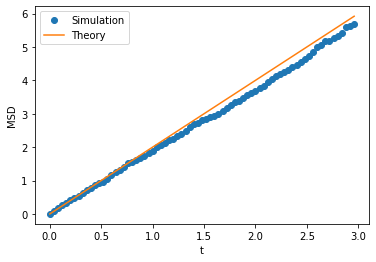

In [3]:
# Model parameters
npart = 1000
ndims = 1
friction = 1.0
k = 0.5
T = 1.0
dt = 0.04
nsteps = int(3.0 / dt)

# Fluctuation dissipation relation
D = T / friction
width = (2 * D * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
msd = []
for i in range(nsteps):
    # Store MSD
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        # force = - k * position
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, msd, 'o', label='Simulation')
# Theoretical diffusive behavior (in the absence of external force)
plt.plot(time, 2 * ndims * D * time, '-', label='Theory')
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.ylabel('MSD')
plt.legend()

**Exercice 1**: *drift-diffusion*

The Brownian particles are subject to a constant external force $F>0$ in one dimension. This will lead to a systematic drift in the motion of the particles.

1. Compute analytically the first two moments of the position, $\langle x(t)\rangle$ and $\langle x^2(t)\rangle$, and provide a physical interpretation of the results
2. Cross-check the results against the simulation data and plot the results in a double logarithmic scale. Identify the ballistic and the diffusive regime.

1.

$\langle x(t)\rangle = \frac{F t}{\xi}$

$\langle x^2(t)\rangle = 2Dt + (\frac{F t}{\xi})^2$

2. Plot in scala lin-lin e confronto con risultati analitici:

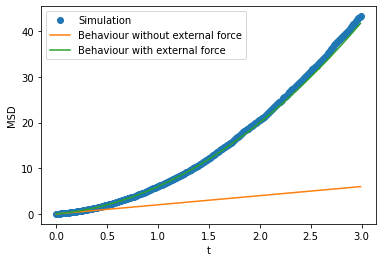

In [4]:
# Model parameters
npart = 1000
ndims = 1
friction = 1.0
k = 0.5
T = 1.0
dt = 0.01
nsteps = int(3.0 / dt)

# Fluctuation dissipation relation
D = T / friction
width = (2 * D * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
md = []
msd = []
for i in range(nsteps):
    # Store MD
    md.append(numpy.sum(positions) / npart)
    # Store MSD
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # Constant external field
        force = numpy.array([-2 for _ in range(ndims)])
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, msd, 'o', label='Simulation')
# Diffusive behavior in the absence of external force
plt.plot(time, 2 * ndims * D * time, '-', label='Behaviour without external force')
plt.plot(time, 2 * ndims * D * time + (force * time / friction)**2, '-', label='Behaviour with external force')
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.ylabel('MSD')
plt.legend()

2. Plot in scala log-log:

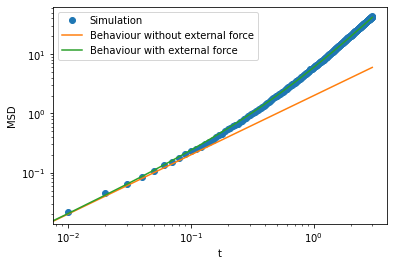

In [5]:
time = numpy.array(range(nsteps)) * dt
plt.loglog(time, msd, 'o', label='Simulation')
# Diffusive behavior in the absence of external force
plt.loglog(time, 2 * ndims * D * time, '-', label='Behaviour without external force')
plt.loglog(time, 2 * ndims * D * time + (force * time / friction)**2, '-', label='Behaviour with external force')
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.ylabel('MSD')
plt.legend()

2. Plot dello spostamento medio:

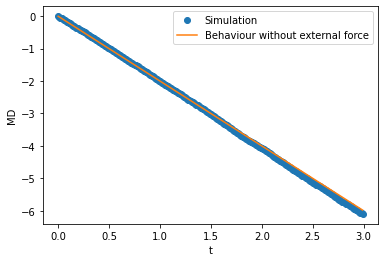

In [6]:
time = numpy.array(range(nsteps)) * dt
plt.plot(time, md, 'o', label='Simulation')
plt.plot(time, force * time / friction, '-', label='Behaviour without external force')
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.ylabel('MD')
plt.legend()

**Exercice 2**: *harmonic potential* 

Put the Brownian particles in a harmonic potential $U(x) = \frac{1}{2}kx^2$ in one dimension.

1. Check that $\langle |\Delta x(t)|^2\rangle$ is diffusive in the absence of external field but saturates to a finite value when the harmonic potential is switched on

2. Determine analytically the equilibrium value $\langle |\Delta x(t=\infty)|^2\rangle$ and compare it to the simulation data. Which factors control the relaxation time that describes the approach to equilibrium? 

2. $\langle |\Delta x(t=\infty)|^2\rangle = \frac{1}{k}$ 

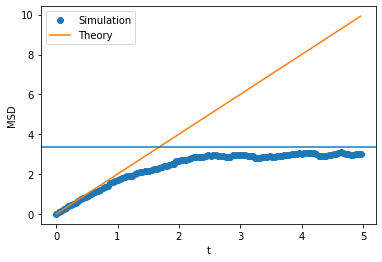

In [9]:
# Model parameters
npart = 1000
ndims = 1
friction = 1.0
k = 0.3
T = 1.0
dt = 0.04
nsteps = int(5.0 / dt)

# Fluctuation dissipation relation
D = T / friction
width = (2 * D * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
msd = []
for i in range(nsteps):
    # Store MSD
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # Harmonic potential
        force = - k * position
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, msd, 'o', label='Simulation')
# Theoretical diffusive behavior (in the absence of external force)
plt.plot(time, 2 * ndims * D * time, '-', label='Theory')
# This is to plot an horizontal line at height y
plt.axhline(1/k, xmin=time[0], xmax=time[-1])
plt.xlabel('t')
plt.ylabel('MSD')
plt.legend()

**Exercice 3**: *thermally activated barrier crossing*

Study numerically the dynamics of a Brownian particle in a one-dimensional double well potential 
$$
U(x) = U_0 (1 - (x/a)^2)^2
$$
The initial position of the particle will be at the bottom of the left well: $x(t=0)=-a$. 
1. Choose a temperature $T > U_0$, for which barrier crossing is easy, and plot a single trajectory $x(t)$ over a sufficiently long time. What do you observe?
2. Reduce the temperature, $T < U_0$, and repeat the numerical experiment. What do you observe? 
3. Give the expression of the probability density $p(x)$ at equilibrium. Can you estimate the time needed to reach equilibrium? (simulate several independent particles in parallel)

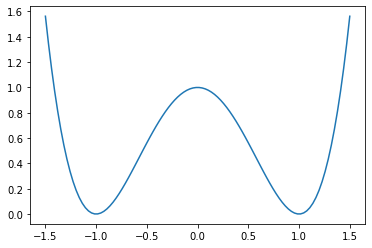

In [10]:
# Double well potential
x = numpy.linspace(-1.5, 1.5, 100)
plt.plot(x, (1-x**2)**2)

1. $T > U_{0}$

Text(0.5, 0, 't')

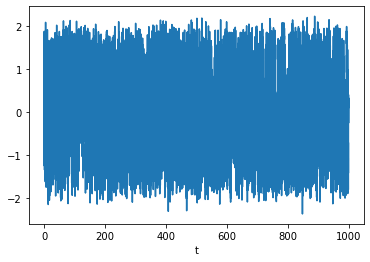

In [19]:
# Model parameters
npart = 1
ndims = 1
friction = 1.0
k = 0.5
T = 2.0
U0 = 1.
dt = 0.01
nsteps = int(1000.0 / dt)
D = T / friction
width = (2 * D * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
pos = []
for i in range(nsteps):
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # force = numpy.zeros(ndims)
        force = 4 * U0 * position * (1 - position**2)
        position += noise + force * dt / friction
    pos.append(position[0])   #numpy.sum(positions**2) / npart)

time = numpy.array(range(nsteps)) * dt
plt.plot(time, pos, '-', label='Simulation')
plt.xlabel('t')

2. $T < U_{0}$

Text(0.5, 0, 't')

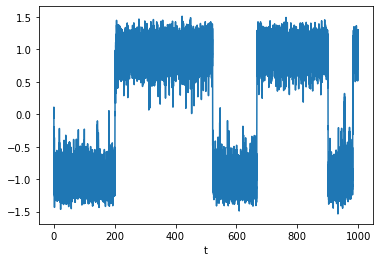

In [18]:
# Model parameters
npart = 1
ndims = 1
friction = 1.0
k = 0.5
T = 0.2
U0 = 1.
dt = 0.01
nsteps = int(1000.0 / dt)
D = T / friction
width = (2 * D * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.zeros((npart, ndims))
pos = []
for i in range(nsteps):
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # force = numpy.zeros(ndims)
        force = 4 * U0 * position * (1 - position**2)
        position += noise + force * dt / friction
    pos.append(position[0])   #numpy.sum(positions**2) / npart)

time = numpy.array(range(nsteps)) * dt
plt.plot(time, pos, '-', label='Simulation')
plt.xlabel('t')

3. $p(x) = p(a) \exp\bigl(-\frac{U(x)}{k_{B}T}\bigr)$

Qui non saprei cosa si intende per tempo necessario a raggiungere l'equilibrio. Se si intende $\tau_{k}$, l'ho calcolato numericamente nelle celle seguenti.

**Exercice 4**: *stochastic resonance*

Consider a Brownian particle in a double well potential
$$
U(x) = U_0 (1 - (x/a)^2)^2
$$
subject to an additional periodic force of the form
$$
F(x) = F_0 \sin(2\pi t/\tau)
$$
where $A$ is the forcing amplitude and $\tau$ is the forcing period. For convenience, set $U_0=1$ and $a=1$.

1. Use Kramers theory to estimate the relaxation time $\tau_K$ at $T=0.4$ *in the absence of forcing* ($A=0$).
2. Add a small forcing $F_0=10^{-1}$ and plot the trajectory of the Brownian particle $x(t)$ over a time much longer than $\tau_K$ in the following two cases: (i) $\tau > \tau_K$, (ii) $\tau < \tau_K$. What do you observe? 
3. Compare your results to the analysis of Benzi, Nonlin. Processes Geophys. 17, 431 (2010) (https://npg.copernicus.org/articles/17/431/2010/) and of Simon & Libchaber, Phys. Rev. Lett. 68, 3375 (1992) (https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.68.3375)

Text(0.5, 0, 't')

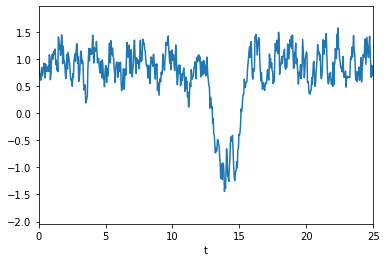

In [386]:
import numpy
import matplotlib.pyplot as plt 

# Model parameters
npart = 1
ndims = 1
friction = 1.0
k = 0.5
T = 0.4
dt = 0.04
nsteps = int(2000.0 / dt)
U_0 = 1
a = 1
A = 0
tau = 100

# Fluctuation dissipation relation
D = T / friction
width = (2 * D * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.ones((npart, ndims))
x = []
msd = []
for i in range(nsteps):
    # Store MSD
    x.append(positions[0, 0])
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        force = 4 * U_0 / a**2 * position * (1-(position/a)**2)
        force += A * numpy.sin(2*numpy.pi * i*dt / tau)
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, x)
plt.xlim([0, 25])
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')

1. $\tau_{k} = \frac{2\pi \xi}{m \omega_{A} \omega_{B}}\exp \bigl( \frac{\Delta U}{k_{B}T}\biggr)$

Poichè:

$\frac{d^{2}U(x)}{dx^{2}} = \frac{4U_{0}}{a^{2}} \bigl(1 - 3(\frac{x}{a})^{2}\bigr)$

e:

$\omega_{A(B)} = \frac{1}{m}\frac{d^{2}U(x_{A(B)})}{dx^{2}}$
    
si ottiene ($\Delta U = U_{0}$, $m = 1$):

$\tau_{k} = \frac{2\pi \xi a^{2}}{2\sqrt{8}U_{0}}\exp \bigl(\frac{U_0}{k_{B}T}\bigr)$

In [43]:
U_0 = 1
a = 1
tau_k = 2*numpy.pi*friction*a**2/2/numpy.sqrt(8)/U_0*numpy.exp(U_0/T)
print(tau_k)

1.3531348640556699e+01


14.375469999999995


Text(0.5, 0, 't')

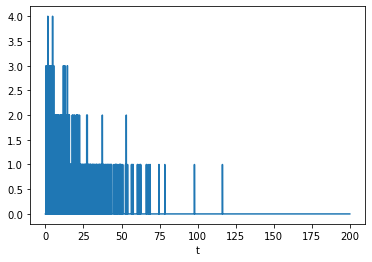

In [45]:
npart = 1000
dt = 0.01
nsteps = int(200.0 / dt)

tau_k = numpy.zeros(nsteps)
mean_tau_k = 0

for j in range(npart):
    # Overdamped Brownian dynamics
    position = 1
    for i in range(nsteps):
        # Noise
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        force = 4 * U_0 / a**2 * position * (1-(position/a)**2)
        position += noise + force * dt / friction
        if position < -0.5:
            mean_tau_k += i*dt
            tau_k[i] += 1
            #print(i)
            break
            
mean_tau_k = mean_tau_k /npart
print(mean_tau_k)

time = numpy.array(range(nsteps)) * dt
plt.plot(time, tau_k)
#plt.xlim([0, 10])
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')

2. Aggiungendo una forza esterna e plottando x(t) per una particella nei casi $\tau < \tau_{k}$ e $\tau > \tau_{k}$ non riesco a vedere differenze significative:

14.866779999999995


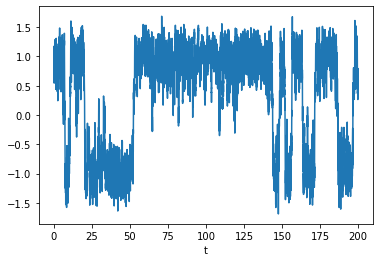

In [40]:
import numpy
import matplotlib.pyplot as plt 

# Model parameters
npart = 1
ndims = 1
friction = 1.0
k = 0.5
T = 0.4
dt = 0.01
nsteps = int(200.0 / dt)
U_0 = 1
a = 1
A = 0
tau = 1e-5

# Fluctuation dissipation relation
D = T / friction
width = (2 * D * dt)**0.5

# Overdamped Brownian dynamics
positions = numpy.ones((npart, ndims))
x = []
msd = []
for i in range(nsteps):
    # Store MSD
    x.append(positions[0, 0])
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        force = 4 * U_0 / a**2 * position * (1-(position/a)**2)
        force += A * numpy.sin(2*numpy.pi * i*dt / tau)
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, x)
#plt.xlim([0, 25])
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')


npart = 1000
tau_k = numpy.zeros(nsteps)
mean_tau_k = 0

for j in range(npart):
    # Overdamped Brownian dynamics
    position = 1
    for i in range(nsteps):
        # Noise
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        force = 4 * U_0 / a**2 * position * (1-(position/a)**2)
        position += noise + force * dt / friction
        if position < -0.5:
            mean_tau_k += i*dt
            tau_k[i] += 1
            #print(i)
            break
            
mean_tau_k = mean_tau_k /npart
print(mean_tau_k)

14.942909999999994


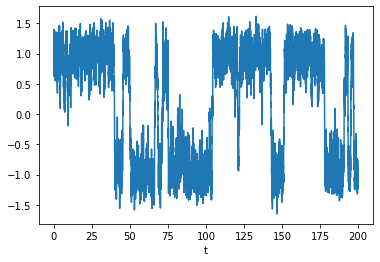

In [41]:
tau = 100

# Overdamped Brownian dynamics
positions = numpy.ones((npart, ndims))
x = []
msd = []
for i in range(nsteps):
    # Store MSD
    x.append(positions[0, 0])
    msd.append(numpy.sum(positions**2) / npart)

    # Integration step
    for position in positions:
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        force = 4 * U_0 / a**2 * position * (1-(position/a)**2)
        force += A * numpy.sin(2*numpy.pi * i*dt / tau)
        position += noise + force * dt / friction

time = numpy.array(range(nsteps)) * dt
plt.plot(time, x)
#plt.xlim([0, 25])
# This is to plot an horizontal line at height y
# plt.axhline(y, xmin=time[0], xmax=time[-1])
plt.xlabel('t')

npart = 1000
tau_k = numpy.zeros(nsteps)
mean_tau_k = 0

for j in range(npart):
    # Overdamped Brownian dynamics
    position = 1
    for i in range(nsteps):
        # Noise
        noise = numpy.random.normal(0.0, width, ndims)
        # No external field
        force = numpy.zeros(ndims)
        # Harmonic potential
        force = 4 * U_0 / a**2 * position * (1-(position/a)**2)
        position += noise + force * dt / friction
        if position < -0.5:
            mean_tau_k += i*dt
            tau_k[i] += 1
            #print(i)
            break
            
mean_tau_k = mean_tau_k /npart
print(mean_tau_k)